# Assignment 02

Joel Brigida

CAP4613-001 Intro to Deep Learning

Prof. Behnaz Ghoraani

Due Date: Feb 6, 2022

## Problem #1:
Assume that a classification model is trained to detect fraudulent emails from non-fraudulent ones, and we would like to test the classifier's efficacy in making such detections. Test data containing 40 email instances are provided. The test data labels are given and denoted as gold-standard labels. The table below provides the gold-standard and predicted labels using this classifier for each data sample. "0" means non-fraudulent emails, and "1" indicates fraudulent emails. Using this table, answer the following questions:

- a) Calculate & Show the Confusion Matrix. NOTE: Detecting fraudulent emails is "important."
- b) Calculate and provide the accuracy of the model.
- c) Calculate the sensitivity of the model.
- d) Calculate the specificity of the model.
- e) Calculate the F1 Measure of the model.
- f) Calculate the Recall and Precision.

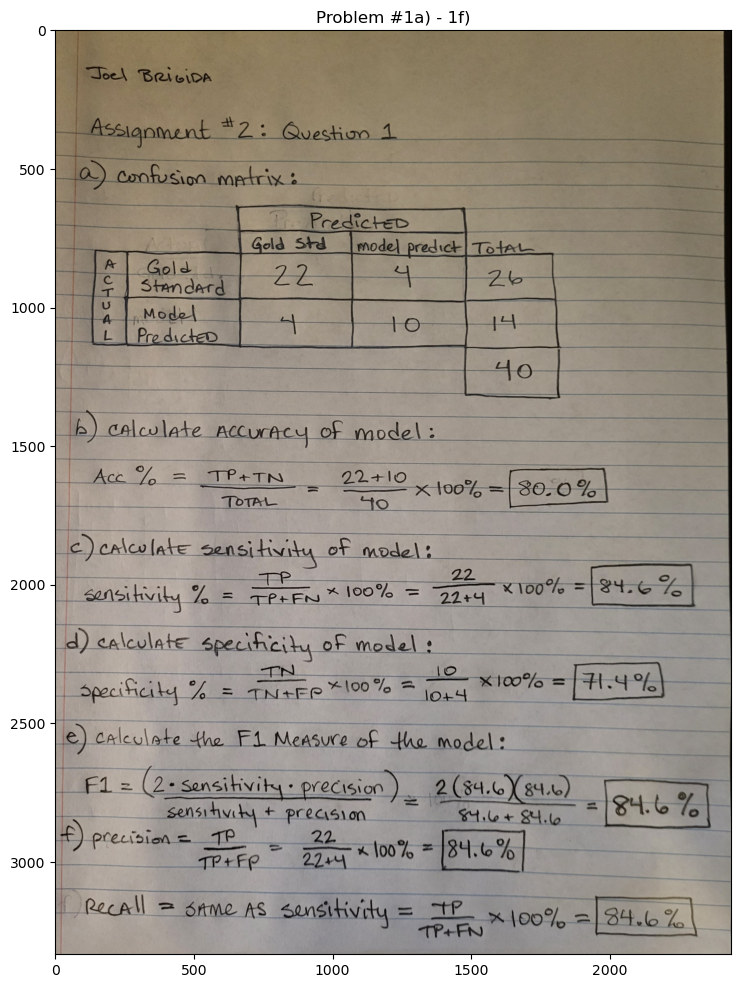

In [1]:
# Import Libraries for image plotting
import matplotlib.pyplot as plt
import matplotlib.image as img

# Upload Handwritten Image:
myImage2 = img.imread('./assets/HW2-Q1.jpg')

plt.figure(figsize = (12, 12))
plt.imshow(myImage2)
plt.title("Problem #1a) - 1f)")
plt.show()

## Problem #2:
The MNIST dataset is divided into training and test sets. Each set comprises a series of images (28 x 28-pixel images of handwritten digits) and their respective labels (values from 0 - 9, representing which digit the image corresponds to).

In [ ]:
# Import Addl libraries for Problem #2:

from keras.datasets import mnist
import numpy as np
from random import randint

### a) Use `mnist` function in `keras.datasets` to load and split the MNIST dataset into the training and testing sets. 

- Name the sets as `x_train`, `y_train`, `x_test` and `y_test`. 

- Print the number of images in each training set, testing set and the image width and height.

In [3]:
# Load Data and Split to Training and Testing Sets:

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
#print(x_train.shape) # (60000, 28, 28)
#print(y_train.shape) # (60000,)
#print(x_test.shape) # (10000, 28, 28)
#print(y_test.shape) # (10000,)

print('The number of Training Images =', x_train.shape[0])
print('The number of Training Labels =', y_train.shape[0])
print('The size of each Training Image is:', x_train.shape[1], 'by', x_train.shape[2], 'pixels \n')
print('The number of Testing Images =', x_test.shape[0])
print('The number of Testing Labels =', y_test.shape[0])
print('The size of each Testing Image is:', x_test.shape[1], 'by', x_test.shape[2], 'pixels')

The number of Training Images = 60000
The number of Training Labels = 60000
The size of each Training Image is: 28 by 28 pixels 

The number of Testing Images = 10000
The number of Testing Labels = 10000
The size of each Testing Image is: 28 by 28 pixels


### b) Write a function that takes two inputs:
- 1) The images of ten digits.
- 2) Their corresponding labels and plots a figure with 10 subplots for each 0-9 digits. Each subplot has the number of the handwritten digit in its title.

In [5]:
def img_plt(img, label):
    plt.figure(figsize=(12, 5.5))
    for i in range (1, 11):
        plt.subplot(2, 5, i)
        plt.imshow(img[i - 1, :, :], cmap = 'gray')
        plt.title('Label: ' + str(label[i - 1]))
    plt.show()

### c) Create a loop to call the function in (b) and plot images from the Training Set to create a figure that includes all 10 digits (0-9).

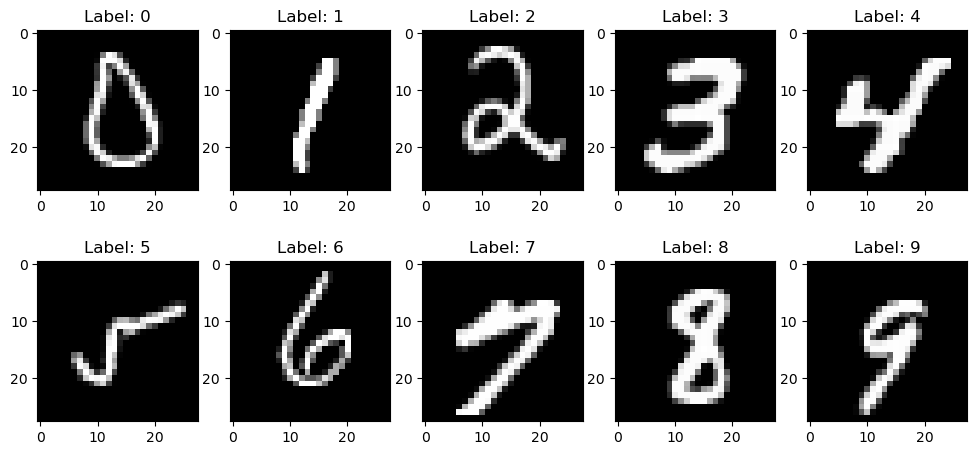

In [6]:
# Select 10 images from the training set
x_train_rnd = np.zeros((10, 28, 28))
y_train_rnd = np.arange(10)

for digit in range(10): # finds 10 images from the set
    x_train_d = x_train[y_train == digit,:,:]
    #x_train_rnd[digit,:,:] = x_train_d[0,:,:] # Select FIRST Digits From Set
    x_train_rnd[digit,:,:] = x_train_d[randint(0, x_train_d.shape[0]),:,:] # Select RANDOM Digits From Set

img_plt(x_train_rnd, y_train_rnd) # plot the images

### d) Select the 0 and 8 digits from the training and testing sets and name them:
- `x_train_01`, `y_train_01`, `x_test_01`, and `y_test_01`.

#### Check Training and Testing Data Set Size (debug)

In [7]:
# Check Training Data Set for correct amount of images:
x_train_TEST1 = x_train[y_train == 0] # Select all Zeros in Training Set
x_train_TEST2 = x_train[y_train == 8] # Select all Eights in Training Set
#print(x_train_TEST1.shape)
#print(x_train_TEST2.shape)
total1 = x_train_TEST1.shape[0] + x_train_TEST2.shape[0]
print(f'Total # of 0\'s and 8\'s in Training Set should be: {x_train_TEST1.shape[0]} + {x_train_TEST2.shape[0]} = {total1}\n')

# Check Test Data Set for correct amount of images:
x_test_TEST1 = x_test[y_test == 0] # Select all Zeros in Testing Set
x_test_TEST2 = x_test[y_test == 8] # Select all Eights in Testing Set
#print(x_test_TEST1.shape)
#print(x_test_TEST2.shape)
total2 = x_test_TEST1.shape[0] + x_test_TEST2.shape[0]
print(f'Total # of 0\'s and 8\'s in Test Set should be: {x_test_TEST1.shape[0]} + {x_test_TEST2.shape[0]} = {total2}\n')

Total # of 0's and 8's in Training Set should be: 5923 + 5851 = 11774

Total # of 0's and 8's in Test Set should be: 980 + 974 = 1954



#### Selecting 0's and 8's From Training & Testing Sets

In [8]:
## Actual Test and Training Set Declarations:
x_train_01 = x_train[np.logical_or(y_train == 8, y_train == 0),:,:] # Select ALL 8's and 0's from the Training Set.
y_train_01 = y_train[np.logical_or(y_train == 8, y_train == 0)] # Get labels for the digits.
#print(x_train_01.shape) # debug
#print(y_train_01.shape) # debug
print(f'Total Number of 0\'s and 8\'s in \'x_train_01\' is: {x_train_01.shape[0]}\n')

x_test_01 = x_test[np.logical_or(y_test == 8, y_test == 0),:,:] # Select ALL 8's and 0's from the Testing Set.
y_test_01 = y_test[np.logical_or(y_test == 8, y_test == 0)]
#print(x_test_01.shape) # debug
#print(y_test_01.shape) # debug
print(f'Total Number of 0\'s and 8\'s in \'x_test_01\' is: {x_test_01.shape[0]}\n')

Total Number of 0's and 8's in 'x_train_01' is: 11774

Total Number of 0's and 8's in 'x_test_01' is: 1954



### e) In machine learning, we typically divide the training set into two training and validation sets to adjust the machine learning model parameters.
- In your code, randomly select 500 training images and their corresponding labels (from x_train_01 and y_train_01) as the validation set and name them x_valid_01 and y_valid_01, respectively. 
- Name the remaining training images and their labels as x_train_01 and y_train_01, respectively. Note: that there are no overlaps between the two sets.

In [9]:
# create array with 11774 indices for TRAINING:
train_indices = np.arange(0, x_train_01.shape[0])
#print(train_indices)

# create array with 1954 indices for TESTING:
test_indices = np.arange(0, x_test_01.shape[0])
#print(test_indices, '\n')

# shuffle the indices of the training array
shuffled_indices_train = np.random.permutation(train_indices)
#print(shuffled_indices_train)

# shuffle the indices of the testing array
shuffled_indices_test = np.random.permutation(test_indices)
#print(shuffled_indices_test, '\n')

# create arrays of SHUFFLED TRAINING data
x_shuffled_all_train = x_train_01[shuffled_indices_train,:,:]
y_shuffled_all_train = y_train_01[shuffled_indices_train]
#print(x_shuffled_all_train.shape)
#print(y_shuffled_all_train.shape, '\n')

# create arrays of SHUFFLED TESTING data
x_shuffled_all_test = x_test_01[shuffled_indices_test,:,:]
y_shuffled_all_test = y_test_01[shuffled_indices_test]
#print(x_shuffled_all_test.shape)
#print(y_shuffled_all_test.shape, '\n')

# create validation set of 500 random images FROM SHUFFLED training set
x_valid_01 = x_shuffled_all_train[0:500,:,:]
y_valid_01 = y_shuffled_all_train[0:500]
print(x_valid_01.shape)
print(y_valid_01.shape, '\n')

# pull the rest of the images (11774 - 500 = 11274) FROM SHUFFLED training set
x_train_01 = x_shuffled_all_train[500:,:,:]
y_train_01 = y_shuffled_all_train[500:]
print(x_train_01.shape)
print(y_train_01.shape, '\n')

# SHUFFLE the TESTING Set
x_test_01 = x_shuffled_all_test[:]
y_test_01 = y_shuffled_all_test[:]
print(x_test_01.shape)
print(y_test_01.shape)

(500, 28, 28)
(500,) 

(11274, 28, 28)
(11274,) 

(1954, 28, 28)
(1954,)


### f) Print the Number of Images in Each Training, Validation, and Testing Set

In [10]:
print(f'The number of images in \'x_train_01\' Training Set = {x_train_01.shape[0]}')
print(f'The number of labels in \'y_train_01\' Training Set = {y_train_01.shape[0]}\n')

print(f'The number of images in \'x_valid_01\' Validation Set = {x_valid_01.shape[0]}')
print(f'The number of labels in \'y_valid_01\' Validation Set = {y_valid_01.shape[0]}\n')

print(f'The number of images in \'x_test_01\' Testing Set = {x_test_01.shape[0]}')
print(f'The number of labels in \'y_test_01\' Testing Set = {y_test_01.shape[0]}')

The number of images in 'x_train_01' Training Set = 11274
The number of labels in 'y_train_01' Training Set = 11274

The number of images in 'x_valid_01' Validation Set = 500
The number of labels in 'y_valid_01' Validation Set = 500

The number of images in 'x_test_01' Testing Set = 1954
The number of labels in 'y_test_01' Testing Set = 1954


### g) Use the function created in part (b) to plot 10 images from the validation set.

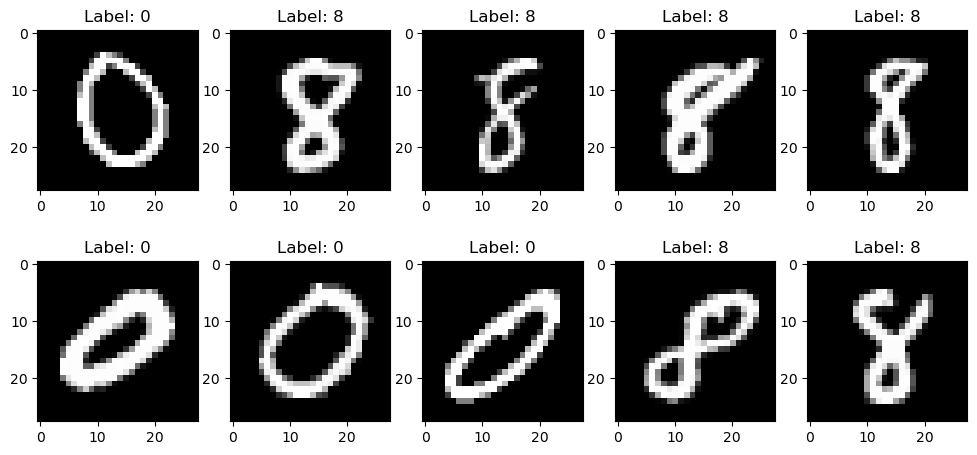

In [11]:
# Function call to render images

img_plt(x_valid_01[0:10,:,:], y_valid_01[0:10]) # Select First 10 images from the set

### h) Convert each image in the training, validation & testing sets to 1 attribute
- calculate the average of all the pixel values in the center 4x4 grid of the image.

#### Function for Calculating Pixel Value:

In [12]:
def avgPixels(someArray):
    
    center_grid = [] # empty list to hold attribute values

    for i in range(someArray.shape[0]): # retreive center grid from training images (11274)
        avg = np.sum(someArray[i, 12:16, 12:16]) / 16 # Sum up the pixels values & divide by 16
        center_grid.append((i, avg)) # append tuple for (x, y) coordinates

    return center_grid

#### Training Data Conversion

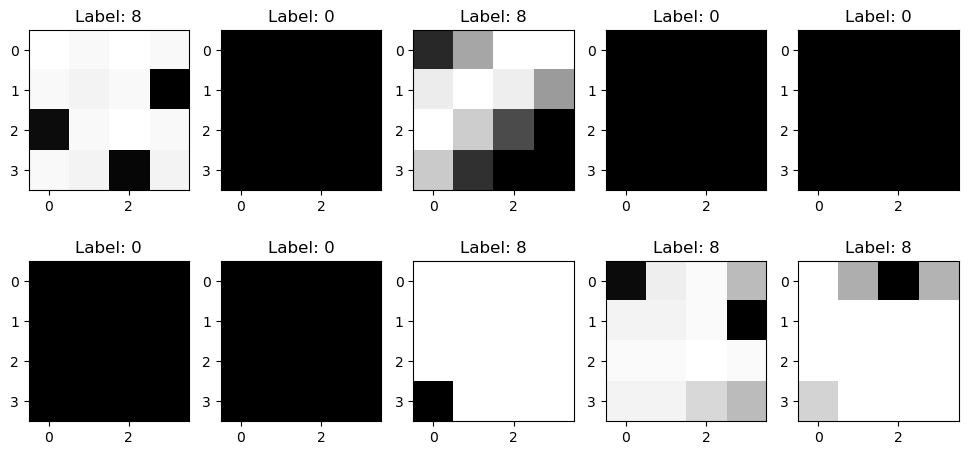

[(0, 245.5), (1, 0.0), (2, 147.9375), (3, 0.0), (4, 0.0), (5, 0.0), (6, 0.0), (7, 244.5625), (8, 246.5625), (9, 227.4375)]


In [13]:
img_plt(x_train_01[0:10, 12:16, 12:16], y_train_01[0:10]) # debug
#print(np.sum(x_train_01[0, 12:16, 12:16])) # Sum up the pixels in the images
#print(np.sum(x_train_01[1, 12:16, 12:16]))
#print(np.sum(x_train_01[2, 12:16, 12:16]))
#print(np.sum(x_train_01[3, 12:16, 12:16]))
#print(np.sum(x_train_01[4, 12:16, 12:16]))

training_grid = avgPixels(x_train_01)

print(training_grid[0:10]) # debug...show 1st 10 indices for reference

#### Validation Data Conversion:

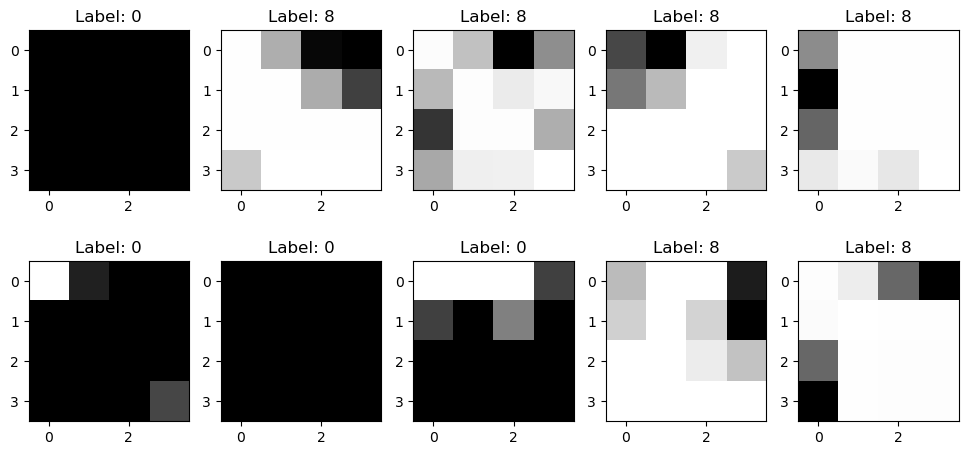

[(0, 0.0), (1, 195.9375), (2, 200.8125), (3, 215.4375), (4, 219.3125), (5, 15.9375), (6, 0.0), (7, 63.8125), (8, 215.1875), (9, 208.75)]


In [14]:
img_plt(x_valid_01[0:10, 12:16, 12:16], y_valid_01[0:10]) # debug
#print(np.sum(x_valid_01[0, 12:16, 12:16])) # Sum up the pixels in the images
#print(np.sum(x_valid_01[1, 12:16, 12:16])) # debugs to check integrity of data
#print(np.sum(x_valid_01[2, 12:16, 12:16]))
#print(np.sum(x_valid_01[3, 12:16, 12:16]))
#print(np.sum(x_valid_01[4, 12:16, 12:16]))

validation_grid = avgPixels(x_valid_01)

print(validation_grid[0:10]) # debug

#### Testing Set Conversion:

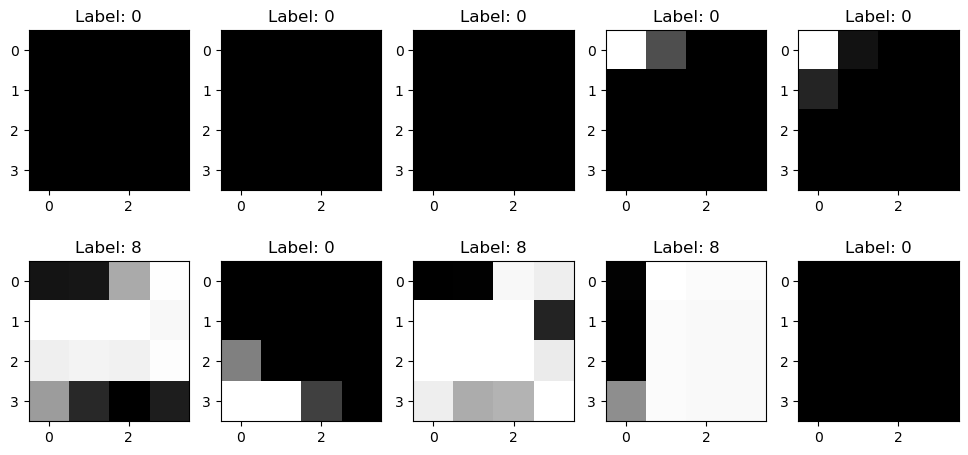

[(0, 0.0), (1, 0.0), (2, 0.0), (3, 14.6875), (4, 16.1875), (5, 166.8125), (6, 43.875), (7, 214.625), (8, 229.4375), (9, 0.0)]


In [15]:
img_plt(x_test_01[0:10, 12:16, 12:16], y_test_01[0:10]) # debug
#print(np.sum(x_test_01[0, 12:16, 12:16])) # Sum up the pixels in the images
#print(np.sum(x_test_01[1, 12:16, 12:16])) # debugs to check integrity of data
#print(np.sum(x_test_01[2, 12:16, 12:16]))
#print(np.sum(x_test_01[3, 12:16, 12:16]))
#print(np.sum(x_test_01[4, 12:16, 12:16]))

test_grid = avgPixels(x_test_01)

print(test_grid[0:10]) # debug

### i) Plot the attribute values of the 500 images in the validation set calculated in part (h). 
- Use different colors and shapes for 0's and 8's.
- The x-axis in your figure is the image number (1 to 500)
- the y-axis is the calculated attribute. Label the axes and add legends appropriately.

In [16]:
def scatterPlot(List1, List2, title, color1 = 'red', color2 = 'blue', yline=-10):
  plt.figure(figsize=(12, 10))
  
  plt.scatter(*zip(*List1), color=color1, s = 15)
  plt.scatter(*zip(*List2), color=color2, s = 15, marker='^')
  plt.xlabel('Image Sample (0 - 499)')
  plt.ylabel('Average 12:16 Square Pixel Value')
  plt.hlines(y = yline, xmin = -10, xmax = 510, color='green', linestyle='--')
  plt.title(f'Scatter Plot of {title}')
  plt.legend(['Class 0', 'Class 8'], fontsize = 11, loc='upper right')
  plt.text((10), (yline - 10), f'y = {yline}', color='green', fontsize=12) # text for threshold line
  plt.xlim(-10, 510)
  plt.ylim(-5, 280)

  plt.show()

#### Function to Split Data to 2 Classes

In [17]:
def splitData(someList, someLabels):
    
    Class0 = [(x, y) for ((x, y), label) in zip(someList, someLabels) if label == 0]
    Class8 = [(x, y) for ((x, y), label) in zip(someList, someLabels) if label == 8]
    
    #print(f'Number of 0\'s = {len(Class0)}')
    #print(f'1st 10 Indices of Class 0: {Class0[0:10]}\n')
    #print(f'Number of 8\'s = {len(Class8)}')
    #print(f'1st 10 Indices of Class 8: {Class8[0:10]}\n')
    
    return Class0, Class8

Number of 0's = 251
Number of 8's = 249


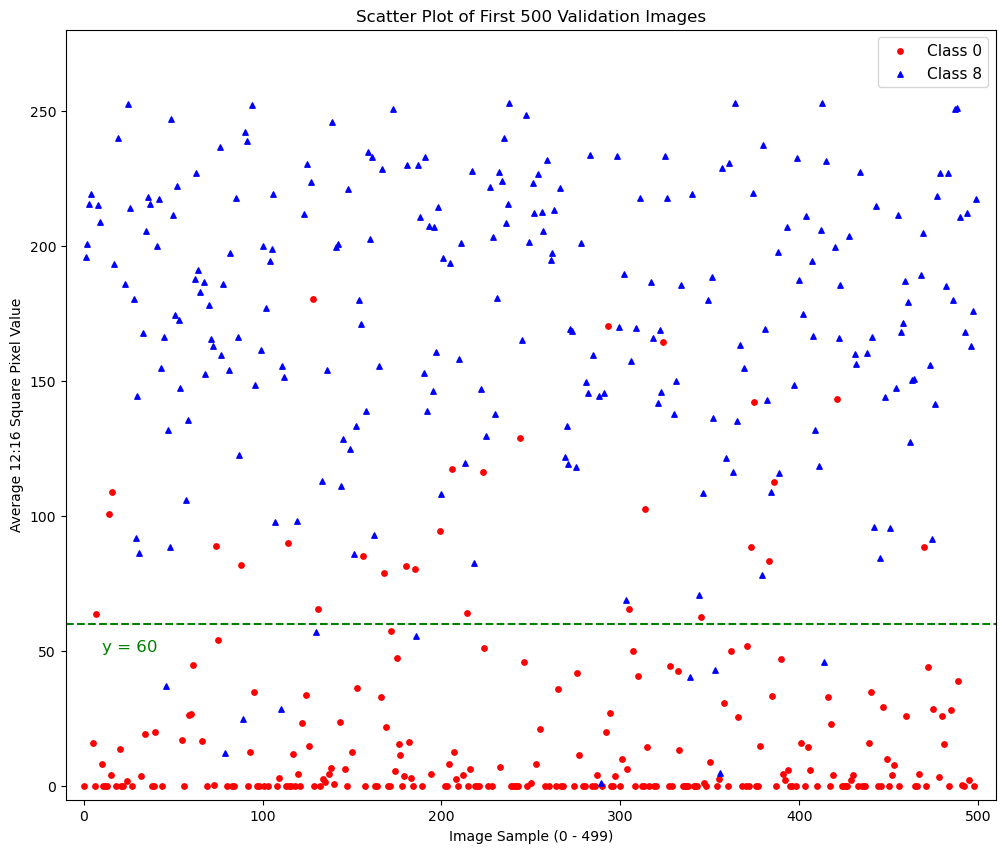

In [18]:
first500Val = validation_grid[0:500]
#print(f'Last 10 indices of Validation: {first500Val[:490:-1]}\n')
first500Labels = y_valid_01[:]

Class0, Class8 = splitData(first500Val, first500Labels) # Split data into 2 Classes

print(f'Number of 0\'s = {len(Class0)}')
#print(f'1st 10 Indices of Class 0: {Class0[0:10]}\n')
print(f'Number of 8\'s = {len(Class8)}')
#print(f'1st 10 Indices of Class 8: {Class8[0:10]}\n')

scatterPlot(Class0, Class8, 'First 500 Validation Images', 'red', 'blue', 60)

### j) Based on observation of the plot (i.e., validation set), guess a threshold for the attribute which differentiates the two classes with the highest accuracy.

##### $$\mathrm{I \ chose \ } y = 60 \ \mathrm{as \ the \ attribute\ threshold}$$

### k) Calculate Training, Validation, & Testing accuracies based on your selected threshold of the corresponding sets and print them.

#### Function to Calculate Accuracy

In [19]:
def calcAccuracy(yline, Class1, Class2, title):

    plotClass1 = 0 # of correct classifications for Red Circles (Class 0)
    plotClass2 = 0 # of correct classifications for Blue Triangle (Class 8)

    for x, y in Class1: # classify the 0s
        #print(x, y)
        if(y < yline):
            plotClass1 += 1

    for x, y in Class2: # classify the 8s
        #print(x, y)
        if(y >= yline):
            plotClass2 += 1

    #print(plotClass1)
    #print(plotClass2, '\n')

    #print(len(Class1))
    #print(len(Class2),'\n')

    print(f'Total Samples in {title} Data Set:', len(Class1) + len(Class2))

    corrClass1 = ((plotClass1 / len(Class1)) * 100) # % of correct classified / total in class
    corrClass2 = ((plotClass2 / len(Class2)) * 100) # % of correct classified / total in class

    print(f'Classification Accuracy for {title} Class 0: %.2f' % corrClass1, '%')
    print(f'Classification Accuracy for {title} Class 8: %.2f' % corrClass2, '%')

    # calculate % of correctly classified data points
    overallAccuracy = (((plotClass1 + plotClass2) / (len(Class1) + len(Class2))) * 100)
    print(f'Overall Accuracy for both {title} Classes: %.2f' % overallAccuracy, '%')
    print()

#### Split Complete Data Sets By Label and Calculate Accuracy

In [20]:
#print(len(training_grid))
#print(training_grid[0:10])
#print(y_train_01.shape,'\n')

#print(len(validation_grid))
#print(validation_grid[0:10])
#print(y_valid_01.shape, '\n')

#print(len(test_grid))
#print(test_grid[0:10])
#print(y_test_01.shape, '\n')

trainZeros, TrainEights = splitData(training_grid, y_train_01)
#print(trainZeros[0:10])
#print(TrainEights[0:10], '\n')
calcAccuracy(60, trainZeros, TrainEights, 'Training')

validZeros, validEights = splitData(validation_grid, y_valid_01)
#print(validZeros[0:10])
#print(validEights[0:10],'\n')
calcAccuracy(60, validZeros, validEights, 'Validation')

testZeros, testEights = splitData(test_grid, y_test_01)
#print(testZeros[0:10])
#print(testEights[0:10])
calcAccuracy(60, testZeros, testEights, 'Testing')

Total Samples in Training Data Set: 11274
Classification Accuracy for Training Class 0: 88.79 %
Classification Accuracy for Training Class 8: 97.77 %
Overall Accuracy for both Training Classes: 93.25 %

Total Samples in Validation Data Set: 500
Classification Accuracy for Validation Class 0: 88.84 %
Classification Accuracy for Validation Class 8: 95.58 %
Overall Accuracy for both Validation Classes: 92.20 %

Total Samples in Testing Data Set: 1954
Classification Accuracy for Testing Class 0: 92.14 %
Classification Accuracy for Testing Class 8: 97.33 %
Overall Accuracy for both Testing Classes: 94.73 %

